## Feature Classification

In this notebook we...

### Novelty
...


#### REFRENCES:
1. Mahana, M., Johns, M., & Apte, A. (2012). Automated essay grading using machine learning. Mach. Learn. Session, Stanford University.

2. Suresh, A., & Jha, M. (2018). Automated essay grading using natural language processing and support vector machine. International Journal of Computing and Technology, 5(2), 18-21.

3. Rokade, A., Patil, B., Rajani, S., Revandkar, S., & Shedge, R. (2018, April). Automated Grading System Using Natural Language Processing. In 2018 Second International Conference on Inventive Communication and Computational Technologies (ICICCT) (pp. 1123-1127). IEEE.

4. Song, S., & Zhao, J. (2013). Automated essay scoring using machine learning. Stanford University.

5. Kakkonen, T., Myller, N., & Sutinen, E. (2006). Applying Part-of-Seech Enhanced LSA to Automatic Essay Grading. arXiv preprint cs/0610118.

In [2]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
import sklearn.metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('features.csv')
data

,essay_id,essay,domain1_score,word_count,sent_count,avg_word_len,lemma_count,spell_err_count,noun_count,adj_count,verb_count,adv_count,neg_score,pos_score,neu_score,cosine_similarity
0,1,"Dear local newspaper, I think effects computer...",8.0,350,16,4.237143,162,0.045714,0.237143,0.051429,0.211429,0.068571,0.000,0.170,0.830,0.090943
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,423,20,4.312057,185,0.061466,0.252955,0.044917,0.200946,0.044917,0.014,0.219,0.766,0.049000
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,283,14,4.342756,145,0.031802,0.289753,0.070671,0.183746,0.056537,0.045,0.197,0.759,0.069262
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,530,27,4.813208,236,0.122642,0.335849,0.079245,0.183019,0.054717,0.008,0.152,0.840,0.056878
4,5,"Dear @LOCATION1, I know having computers has a...",8.0,473,30,4.334038,190,0.035941,0.241015,0.067653,0.190275,0.076110,0.026,0.096,0.879,0.071470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3190,I believe that they should not be pulled off o...,4.0,368,28,4.105978,152,0.024457,0.195652,0.097826,0.190217,0.081522,0.121,0.092,0.786,0.221566
1996,3191,When have you ever went into a library and fou...,4.0,610,36,4.013115,199,0.031148,0.178689,0.054098,0.254098,0.068852,0.144,0.051,0.805,0.212200
1997,3192,When I go to a library I @MONTH1 find some stu...,3.0,196,11,4.076531,102,0.045918,0.183673,0.102041,0.250000,0.051020,0.156,0.107,0.737,0.134513
1998,3193,"Certain people beleive that offensive books, m...",3.0,382,19,4.526178,141,0.031414,0.225131,0.083770,0.206806,0.078534,0.128,0.074,0.798,0.206831


In [4]:
X=data.iloc[:,3:]
y=data.iloc[:,2]

In [5]:
X_train, X_test , y_train, y_test = train_test_split(X ,y, test_size=0.2 , random_state=0)

### Random Forest Classifier

In [6]:
rf = RandomForestClassifier(class_weight='balanced_subsample')
rf_params = {'n_estimators':list(range(20,200,10)),
                'max_depth':list(range(2,14,1))}

In [7]:
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'macro')
rf_random=GridSearchCV(estimator = rf, param_grid  = rf_params, cv = 5, verbose=2,  n_jobs = 2, scoring=scorer)

In [8]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample'),
             n_jobs=2,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100,
                                          110, 120, 130, 140, 150, 160, 170,
                                          180, 190]},
             scoring=make_scorer(f1_score, average=macro), verbose=2)

In [9]:
rf_final = RandomForestClassifier(random_state=0, n_estimators=rf_random.best_params_['n_estimators'], max_depth=rf_random.best_params_['max_depth'],class_weight='balanced_subsample')
rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       n_estimators=50, random_state=0)

In [10]:
X_pred = rf_final.predict(X_test)

In [11]:
report = classification_report(X_pred,y_test,digits=3)
print(report)

              precision    recall  f1-score   support

         1.0      0.000     0.000     0.000         0
         2.0      0.444     1.000     0.615         4
         3.0      0.611     0.440     0.512        25
         4.0      0.524     0.647     0.579        17
         5.0      0.000     0.000     0.000         4
         6.0      0.714     0.556     0.625        27
         7.0      0.500     0.229     0.314        48
         8.0      0.500     0.709     0.586       103
         9.0      0.371     0.329     0.349        79
        10.0      0.338     0.423     0.376        52
        11.0      0.389     0.219     0.280        32
        12.0      0.286     0.222     0.250         9

    accuracy                          0.455       400
   macro avg      0.390     0.398     0.374       400
weighted avg      0.457     0.455     0.439       400



<AxesSubplot:>

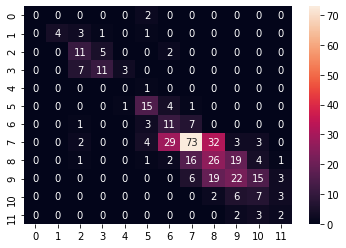

In [12]:
cm = confusion_matrix(y_test, X_pred)
sns.heatmap(cm, annot=True)

In [13]:
accuracy_score(y_test, X_pred)

0.455

### XGB CLASSIFIER

In [14]:
xgb_clf = XGBClassifier(tree_method = "exact", predictor = "cpu_predictor",
                            objective = "multi:softmax")

In [15]:
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}
# subsample: Denotes the subsample ratio of columns for each split, in each level.
# colsample_bytree: Denotes the fraction of columns to be randomly samples for each tree.
# gamma: Gamma specifies the minimum loss reduction required to make a split.
# reg_alpha: Lasso L1 regularization
# reg_lambda: Ridge L2 reguralarization

In [16]:
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
                             cv = 10, verbose = 3, random_state = 40 )


In [17]:
model_xgboost = xgb_rscv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[01:32:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.6s
[01:32:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.6s
[01:32:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the 

[CV 10/10] END colsample_bytree=0.8, gamma=2, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=100, reg_alpha=1, reg_lambda=4.5, subsample=0.4; total time=   0.8s
[01:32:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=2, min_child_weight=1, n_estimators=250, reg_alpha=0.5, reg_lambda=4.5, subsample=0.2; total time=   1.1s
[01:32:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=2, min_child_weight=1, n_estimators=250, reg_alpha=0

[CV 9/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   1.2s
[01:33:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 10/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.7s
[01:33:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END colsample_bytree=1.0, gamma=0.01, learning_rate=0.001, max_depth=10, min_child_weight=7, n_estimators=500, reg_alpha=1, reg

[CV 8/10] END colsample_bytree=0.6, gamma=0.01, learning_rate=0.001, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=1, reg_lambda=3, subsample=0.7; total time=   1.0s
[01:33:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 9/10] END colsample_bytree=0.6, gamma=0.01, learning_rate=0.001, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=1, reg_lambda=3, subsample=0.7; total time=   1.1s
[01:33:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 10/10] END colsample_bytree=0.6, gamma=0.01, learning_rate=0.001, max_depth=10, min_child_weight=3, n_estimators=100, reg_alph

[CV 7/10] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=1000, reg_alpha=0, reg_lambda=1.5, subsample=0.4; total time=   7.3s
[01:35:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 8/10] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=1000, reg_alpha=0, reg_lambda=1.5, subsample=0.4; total time=   8.6s
[01:35:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 9/10] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=1000, reg_alpha=0

[CV 6/10] END colsample_bytree=0.6, gamma=2, learning_rate=0.001, max_depth=7, min_child_weight=7, n_estimators=250, reg_alpha=0.5, reg_lambda=2, subsample=0.4; total time=   1.2s
[01:36:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 7/10] END colsample_bytree=0.6, gamma=2, learning_rate=0.001, max_depth=7, min_child_weight=7, n_estimators=250, reg_alpha=0.5, reg_lambda=2, subsample=0.4; total time=   1.4s
[01:36:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 8/10] END colsample_bytree=0.6, gamma=2, learning_rate=0.001, max_depth=7, min_child_weight=7, n_estimators=250, reg_alpha=0.5, re

In [18]:
xgb_final = XGBClassifier(random_state=0, 
                          n_estimators=xgb_rscv.best_params_['n_estimators'], 
                          max_depth=xgb_rscv.best_params_['max_depth'],
                          learning_rate=xgb_rscv.best_params_['learning_rate'],
                          gamma=xgb_rscv.best_params_['gamma'],
                          colsample_bytree=xgb_rscv.best_params_['colsample_bytree'],
                          subsample=xgb_rscv.best_params_['subsample'],
                          reg_alpha=xgb_rscv.best_params_['reg_alpha'],
                          reg_lambda=xgb_rscv.best_params_['reg_lambda'],
                          min_child_weight=xgb_rscv.best_params_['min_child_weight'])
xgb_final.fit(X_train, y_train)

[01:36:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=1.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
y_pred = xgb_final.predict(X_test)

In [20]:
report = classification_report(y_pred,y_test,digits=3)
print(report)

              precision    recall  f1-score   support

         1.0      0.000     0.000     0.000         0
         2.0      0.222     1.000     0.364         2
         3.0      0.556     0.476     0.513        21
         4.0      0.667     0.636     0.651        22
         5.0      0.000     0.000     0.000         4
         6.0      0.667     0.560     0.609        25
         7.0      0.136     0.333     0.194         9
         8.0      0.822     0.670     0.738       179
         9.0      0.300     0.477     0.368        44
        10.0      0.523     0.430     0.472        79
        11.0      0.111     0.222     0.148         9
        12.0      0.000     0.000     0.000         6

    accuracy                          0.550       400
   macro avg      0.334     0.401     0.338       400
weighted avg      0.618     0.550     0.575       400



<AxesSubplot:>

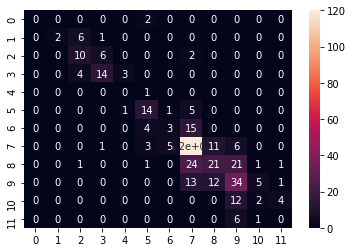

In [21]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True)

In [22]:
accuracy_score(y_test, y_pred)

0.55

### SUPPORT VECTOR CLASSIFIER

In [23]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

In [24]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_Train, y_train)

SVC(random_state=0)

In [25]:
Y_Pred = classifier.predict(X_Test)

<AxesSubplot:>

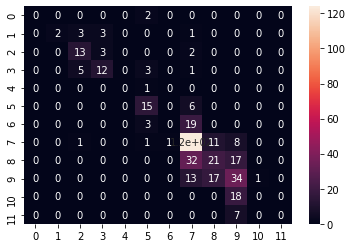

In [26]:
cm2 = confusion_matrix(y_test, Y_Pred)
sns.heatmap(cm2, annot=True)

In [27]:
accuracy_score(y_test, Y_Pred)

0.5525